### Machine Learning

#### Task
#### Data
#### Modeling
#### Error Measurement
#### Training and Optimization
#### Performance Measurement
#### Validating and testing
#### Corrective Measures

In [33]:
#Kaggle Second hand cars
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow import keras
from keras.layers import Normalization,Dense,InputLayer
from keras.losses import MeanSquaredError,Huber,MeanAbsoluteError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
import matplotlib.pyplot as plt 

In [34]:
data = pd.read_csv("carPricePrediction.csv")
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [35]:
data.shape

(1000, 12)

In [36]:
col = data.columns.tolist()
col = col[3:]
col

['years',
 'km',
 'rating',
 'condition',
 'economy',
 'top speed',
 'hp',
 'torque',
 'current price']

In [37]:
#sns.pairplot(data[col],diag_kind='kde')

In [38]:
tensor_data = tf.constant(data,dtype = tf.float32)
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], dtype=float32)>

In [39]:
#Shuffling to avoid any bias that may have occured while collecting the data
tensor_data = tf.random.shuffle(tensor_data)
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[2.310000e+02, 6.346480e+05, 8.226700e+05, ..., 1.160000e+02,
        9.000000e+01, 4.200755e+05],
       [9.400000e+01, 6.552530e+05, 8.741060e+05, ..., 7.200000e+01,
        1.070000e+02, 1.993135e+05],
       [7.500000e+01, 5.720940e+05, 7.145210e+05, ..., 1.050000e+02,
        9.000000e+01, 1.248475e+05],
       ...,
       [4.680000e+02, 6.319670e+05, 8.069290e+05, ..., 7.100000e+01,
        1.250000e+02, 1.228435e+05],
       [7.370000e+02, 5.309510e+05, 7.410860e+05, ..., 1.060000e+02,
        1.180000e+02, 1.870500e+05],
       [2.660000e+02, 5.988890e+05, 8.275680e+05, ..., 6.900000e+01,
        9.900000e+01, 3.181480e+05]], dtype=float32)>

In [40]:
X = tensor_data[:,3:-1]
print(X)

tf.Tensor(
[[7.00000e+00 7.92200e+04 1.00000e+00 ... 2.00000e+02 1.16000e+02
  9.00000e+01]
 [4.00000e+00 1.41405e+05 4.00000e+00 ... 1.97000e+02 7.20000e+01
  1.07000e+02]
 [4.00000e+00 1.29978e+05 5.00000e+00 ... 1.69000e+02 1.05000e+02
  9.00000e+01]
 ...
 [3.00000e+00 1.49565e+05 5.00000e+00 ... 1.51000e+02 7.10000e+01
  1.25000e+02]
 [4.00000e+00 1.16318e+05 3.00000e+00 ... 1.71000e+02 1.06000e+02
  1.18000e+02]
 [7.00000e+00 9.71600e+04 3.00000e+00 ... 1.65000e+02 6.90000e+01
  9.90000e+01]], shape=(1000, 8), dtype=float32)


In [41]:
y = tensor_data[:,-1]
y = tf.expand_dims(y,axis = -1)
print(y[:5])

tf.Tensor(
[[420075.5]
 [199313.5]
 [124847.5]
 [295553.5]
 [ 77167. ]], shape=(5, 1), dtype=float32)


In [42]:
train_ratio = 0.8
test_ratio = 0.1
val_ratio = 0.1
data_size = len(X)

In [43]:
X_train = X[:int(data_size*train_ratio)]
y_train = y[:int(data_size*train_ratio)]

In [44]:
X_val = X[int(data_size*train_ratio):int(data_size*(train_ratio+val_ratio))]
y_val = y[int(data_size*train_ratio):int(data_size*(train_ratio+val_ratio))]

In [45]:
X_test = X[int(data_size*(train_ratio+val_ratio)):]
y_test = y[int(data_size*(train_ratio+val_ratio)):]

In [46]:
#Normalizing data
normalizer = Normalization(axis = -1)
normalizer.adapt(X_train) #get mean,sd for each

#### The activation function introduces non-linearity and produces the output of each neuron in the hidden layer.

In [47]:
model = keras.Sequential([
    InputLayer(input_shape = (8,)),
    normalizer,
    Dense(128,activation = 'relu'),
    Dense(128,activation = 'relu'),
    Dense(128,activation = 'relu'),
    Dense(1),
])
model.summary()
""" model = keras.Sequential()
model.add(normalizer)
current_prices_needed = 1
model.add(Dense(current_prices_needed))
model.summary() """

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 34,322
Trainable params: 34,305
Non-trainable params: 17
_________________________________________________

' model = keras.Sequential()\nmodel.add(normalizer)\ncurrent_prices_needed = 1\nmodel.add(Dense(current_prices_needed))\nmodel.summary() '

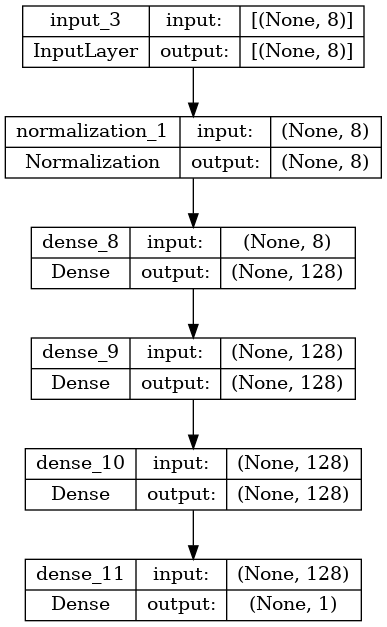

In [48]:
keras.utils.plot_model(model,to_file="model.png",show_shapes=True)

### we pass batches to model->dividing input into different parts 
### commonly used 32,64

## Error Measurement

In [49]:
model.compile(
    optimizer=Adam(learning_rate=1),
    loss = MeanAbsoluteError(),
    metrics=RootMeanSquaredError()
    )
#incase of outliers are present we cant use mean squared error we preferrably use MeanAbsoluteError()
#Intelligent Erroring Huber Loss
#Delta should be specified for Huber Loss

## Training and Optimization

In [50]:
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs = 100,verbose = 2)
#epochs = no of times weights is updated

Epoch 1/100


25/25 - 1s - loss: 172859.0938 - root_mean_squared_error: 216454.2031 - val_loss: 92005.8984 - val_root_mean_squared_error: 112066.9922 - 694ms/epoch - 28ms/step
Epoch 2/100
25/25 - 0s - loss: 95684.9766 - root_mean_squared_error: 117923.4844 - val_loss: 60722.0508 - val_root_mean_squared_error: 75738.9375 - 73ms/epoch - 3ms/step
Epoch 3/100
25/25 - 0s - loss: 53782.9336 - root_mean_squared_error: 66718.9297 - val_loss: 47668.9844 - val_root_mean_squared_error: 58951.6992 - 75ms/epoch - 3ms/step
Epoch 4/100
25/25 - 0s - loss: 50527.2852 - root_mean_squared_error: 63933.3984 - val_loss: 45598.9688 - val_root_mean_squared_error: 55907.6406 - 75ms/epoch - 3ms/step
Epoch 5/100
25/25 - 0s - loss: 51967.3789 - root_mean_squared_error: 65266.5391 - val_loss: 43751.3555 - val_root_mean_squared_error: 53518.6406 - 76ms/epoch - 3ms/step
Epoch 6/100
25/25 - 0s - loss: 43659.1484 - root_mean_squared_error: 53813.5391 - val_loss: 45041.3438 - val_root_mean_squared_error: 56768.6914 - 74ms/epoch - 3

In [51]:
ls = list(history.history.keys())
ls

['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error']

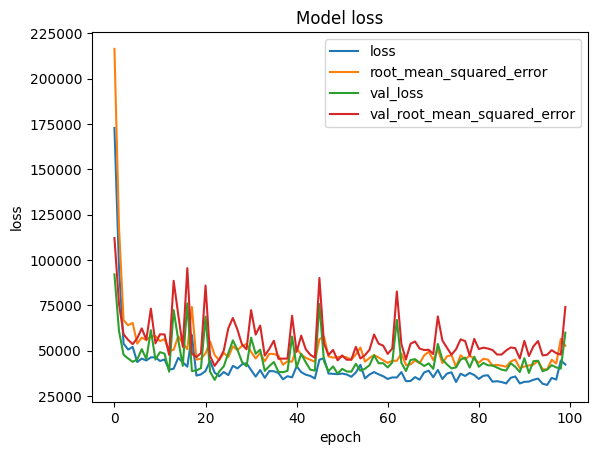

In [52]:
for i in ls:
    plt.plot(history.history[i])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(ls)
plt.show()

### Performance Measurement

In [53]:
print(model.evaluate(X_val,y_val))
print(len(X_test))

4/4 [==============================] - 0s 3ms/step - loss: 59845.8398 - root_mean_squared_error: 74028.2656
[59845.83984375, 74028.265625]
100


In [54]:
#validaion set and test set
y_pred = list(model.evaluate(X_test,y_test))

4/4 [==============================] - 0s 2ms/step - loss: 52390.3984 - root_mean_squared_error: 63363.7773


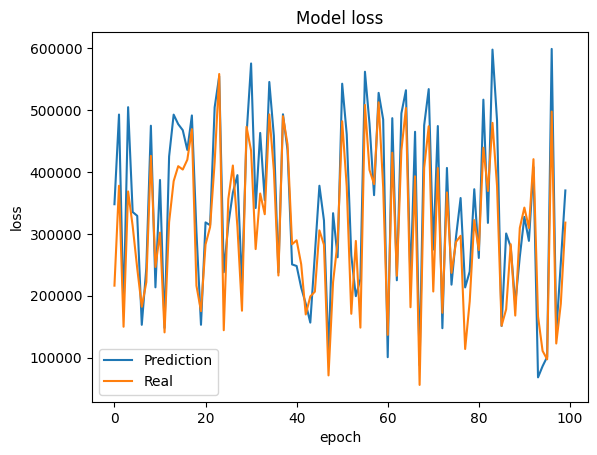

In [60]:
plt.plot(y_pred)
plt.plot(y_test)
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Prediction','Real'])
plt.show()

In [56]:
X_test.shape

TensorShape([100, 8])

In [57]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [61]:
model.predict(tf.expand_dims(X_test[0],axis = 0))

1/1 [==============================] - 0s 20ms/step


array([[347859.4]], dtype=float32)

In [59]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([216302.], dtype=float32)>

### Underfitted model so very huge loss we use nn for this